# Logisitc Regression

Logistic Regression is the probability of being in a particular class. For example, given two groups (class A and class B). What is the probability that a given dataset is in Class A as opposed to Class B?

### Logistic Regression vs Linear Regression

Logistic Regression applies an activation function to categorize a given dataset into categories based on a probability (between 0 and 1). Linear Regression outputs continuous numerical values to show a correlation.

<strong>Linear Regression</strong> = y = b0 + b1x  OR y = mx + b

Linear Regression --> Outputs continuous values (i.e. age 1, 4, 8, 22, 60, etc.)  

<strong>Logistic Model</strong> = p = 1 / 1 + e^-(b0 + b1x)  OR p = 1/1+e^-(mx+b)

Logistic regression --> Outputs discrete values (i.e. young vs old, yes vs no, class A vs class B, etc.)

<img src="images/linreg v logreg.png">

"If the probability results in greater than 50%, then this dataset belongs in group A. If it is less than 50%, then this dataset belongs in group B."

### Logistic Regression is a statistical method for predicting binary outcomes from data.

Example: yes vs no, or young vs old

### We can calculate Logistic Regression by adding an "ACTIVATION FUNCTION" as a final step in our linear model --> converting the linear regression output into a probability

In [57]:
# Step 1: Import the Regression based dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [58]:
# Step 2: Get the data. For this example, we will use make_blobs for random data
# make_blobs creates clusters of points, mainly used for logistic regression

from sklearn.datasets import make_blobs

In [59]:
# Step 3: Assign X and y

X, y = make_blobs(centers=2, random_state=42)

# Notice how we tell the function how many groups we want via "centers"

# Here the y is the labels (which is binary)
print("Labels: {}".format(y[:10]))

# The X is the "coordinate" on the graph. make_blobs will always make the X 2d
print("Data: {}".format(X[:10]))

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


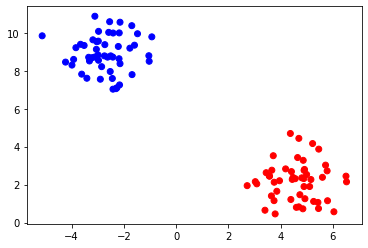

In [60]:
# Step 4 (optional): plot the graph

# What does the below 'col' mean? If the output (y) is 0, make it blue. if not, make it red
col = np.where(y==0, 'blue', 'red')

# What does the below scatter plot code mean? for each X input, plot the first and second value, then colo with 'col'
plt.scatter(X[:, 0], X[:, 1], c=col)

# How to read: the plot does not have any y axis. Visualize it as a X1 axis and X2 axis
# The red and blue dots are the values of y (in this case, it is 0 or 1)
# Example: using the first 'coordinates' in the 2d array
    # X1 (horizontal axis) = -2.99
    # X2 (vertical axis) = 3.03
    # y value = blue

In [61]:
# Step 5: split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# stratify: tells the dependency to randomize the datasets but still keep the resulting labels
# as closely related to the labels of the original dataset

In [62]:
# Step 6: create a logisitc regression model (similar code to linear regression modeling)

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

# Note: This method also supports multivariate datasets as well

In [63]:
# Step 7: Fit (train) the training data

classifier.fit(X_train, y_train)

LogisticRegression()

In [64]:
# Step 8: Validate the model using the test data

print(f"Training Data: {classifier.score(X_train, y_train)}")
print(f"Testing Data: {classifier.score(X_test, y_test)}")

Training Data: 1.0
Testing Data: 1.0


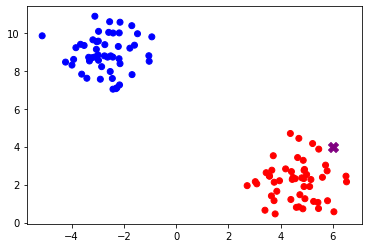

In [65]:
# Step 9: Make predictions (we can do this by generating a new point, then throw that point in the model)

# create the new data point
# new_data = np.array([[-2, 6]])
new_data = np.array([[6, 4]])

# plot the new data against the original dataset
col = np.where(y==0, 'blue', 'red')
plt.scatter(X[:, 0], X[: , 1], c=col)
plt.scatter(new_data[0, 0], new_data[0, 1], c='purple', marker='X', s=100)

### Judging by its placement, it should be predicted as 0 or 'in the blue class'

In [66]:
# Step 10: Predict the class of the new data point (blue or red)

predictions = classifier.predict(new_data)
print("Classes are either 0 (blue) or 1 (red)")
print(f"The new data was classified as: {predictions}")

Classes are either 0 (blue) or 1 (red)
The new data was classified as: [1]


In [67]:
# Step 11 (optional): We can also compare the predictions to the actual dataset using pandas

predictions = classifier.predict(X_test)
comparison = pd.DataFrame({"Predictions": predictions,
             "Actual": y_test})

comparison.head(10)

,Predictions,Actual
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0
